<a href="https://colab.research.google.com/github/adarshh347/RAG-Based-Applications/blob/main/Langchain_Agent_Aesthetic_Enhancer_Analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# hugging face models
# https://huggingface.co/openai/clip-vit-large-patch14
# https://huggingface.co/nlpconnect/vit-gpt2-image-captioning


In [1]:
!pip install datasets transformers torch torchvision clip-by-openai

from datasets import load_dataset
import torch
import clip
from PIL import Image

INFO: pip is looking at multiple versions of clip-by-openai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of clip-by-openai to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://p

ModuleNotFoundError: No module named 'datasets'

In [ ]:
curl -X GET \
     -H "Authorization: Bearer $HF_TOKEN" \
     "https://datasets-server.huggingface.co/rows?dataset=laion%2Flaion2B-en-aesthetic&config=default&split=train&offset=0&length=100"

In [ ]:
# Install necessary libraries
!pip install datasets

from datasets import load_dataset

# Load a smaller subset using streaming (efficient for large datasets)
dataset = load_dataset("laion/laion2B-en-aesthetic", split="train", streaming=True)

# Take a smaller subset (e.g., first 10,000 samples)
subset_size = 10_000
small_dataset = dataset.shuffle(seed=42).take(subset_size)

# Convert to list (optional, useful for local processing)
small_list = list(small_dataset)


  Using cached datasets-3.3.2-py3-none-any.whl.metadata (19 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached xxhash-3.5.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.16-py311-none-any.whl.metadata (7.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.2 MB/s eta 0:00:00


Resolving data files:   0%|          | 0/128 [00:00<?, ?it/s]

In [ ]:
print(len(small_list))

10000


In [ ]:
print(small_list[0])

{'URL': 'https://isteam.wsimg.com/ip/5629a8dc-b875-11e4-bc28-14feb5d39f6a/ols/6399_original/:/rs=w:600,h:600', 'TEXT': "Keep on Truckin' Patch 4 x 4 Vintage Style 70's Truck Patch 10cm", 'WIDTH': 600, 'HEIGHT': 491, 'similarity': 0.2898448705673218, 'hash': 2102425148808823166, 'punsafe': 0.00021663308143615723, 'pwatermark': 0.17166881263256073, 'aesthetic': 7.118573188781738}


In [ ]:
small_list

[{'URL': 'https://isteam.wsimg.com/ip/5629a8dc-b875-11e4-bc28-14feb5d39f6a/ols/6399_original/:/rs=w:600,h:600',
  'TEXT': "Keep on Truckin' Patch 4 x 4 Vintage Style 70's Truck Patch 10cm",
  'WIDTH': 600,
  'HEIGHT': 491,
  'similarity': 0.2898448705673218,
  'hash': 2102425148808823166,
  'punsafe': 0.00021663308143615723,
  'pwatermark': 0.17166881263256073,
  'aesthetic': 7.118573188781738},
 {'URL': 'https://cdn2-www.superherohype.com/assets/uploads/2015/03/cassidy-94x71.jpg',
  'TEXT': "AMC's Preacher Finds Its Cassidy in Joseph Gilgun",
  'WIDTH': 94,
  'HEIGHT': 71,
  'similarity': 0.3063996136188507,
  'hash': 6415717639664860007,
  'punsafe': 2.7265545213595033e-05,
  'pwatermark': 0.1030094102025032,
  'aesthetic': 7.107040882110596},
 {'URL': 'https://photos.smugmug.com/Indiana/Indiana/i-wV8NsPM/3/8882594c/XL/IN-091025-0002-2-XL.jpg',
  'TEXT': 'Lifeguard station in Washington Park beach. Michigan City, IN<br /> <br /> IN-091025-0002-2',
  'WIDTH': 512,
  'HEIGHT': 768,
  '

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch

# Load the CLIP model (pretrained on aesthetic scoring)
model_name = "laion/CLIP-Aesthetic"
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")  # Using a base CLIP model
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
def get_image_features(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        image_features = model.get_image_features(**inputs)

    return image_features

In [ ]:
image_path = "/content/sample.jpeg"

In [ ]:
features = get_image_features(image_path)
print(features.shape)

torch.Size([1, 512])


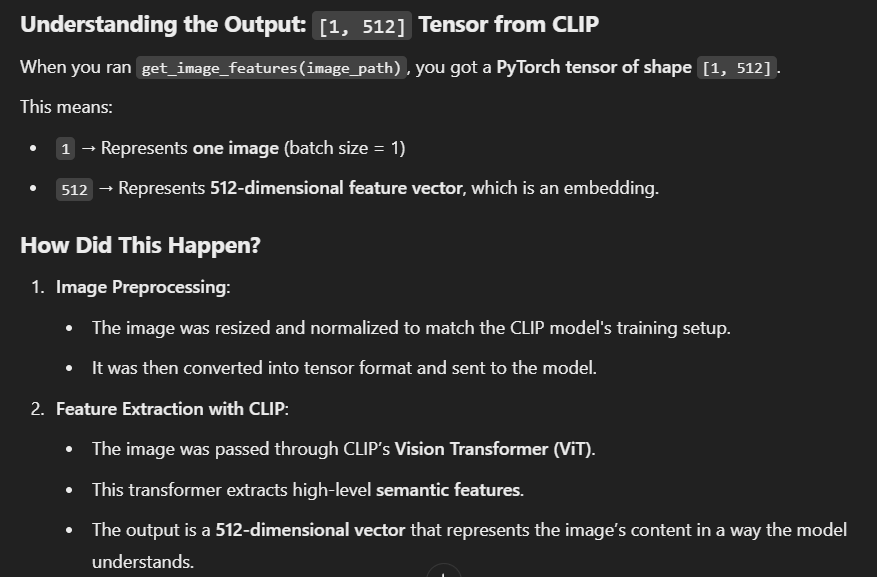

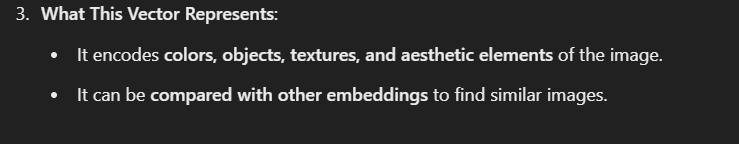

In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 40.5 MB/s eta 0:00:00


In [ ]:
import faiss
import numpy as np

index = faiss.IndexFlatL2(512)
def add_to_index(index,image_features):
  vec = image_features.numpy().astype('float32')
  index.add(vec)
# converts the pytorch tensor to FAISS-compatible format
add_to_index(index,features)
faiss.write_index(index,"aesthetic_index.faiss")


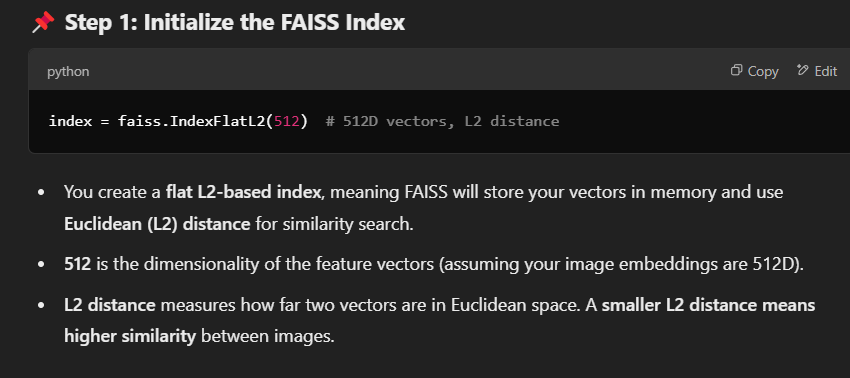

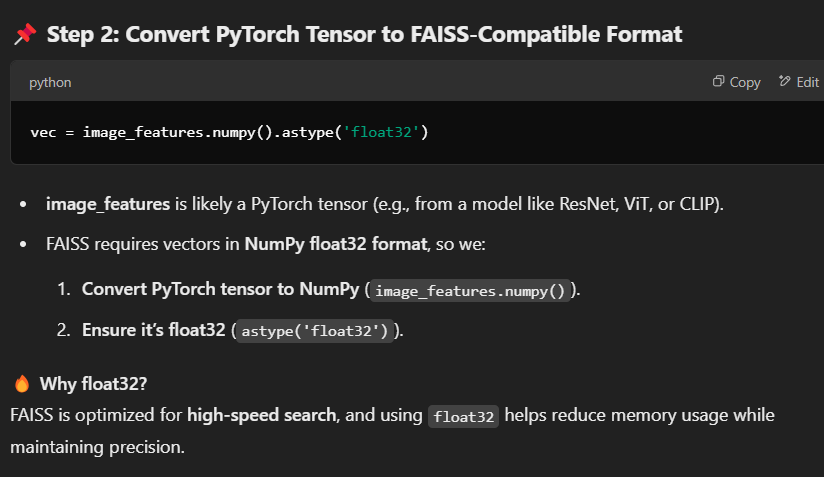

In [ ]:
print(index.ntotal,index.d)

1 512


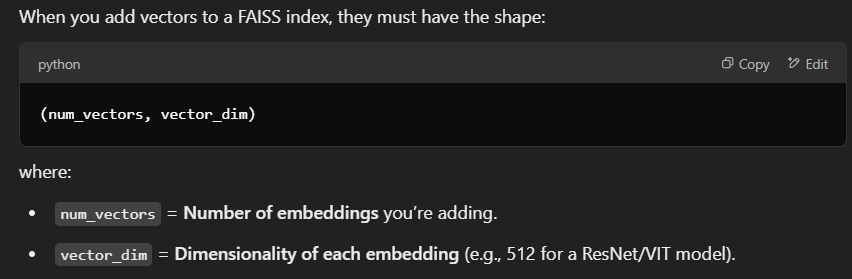

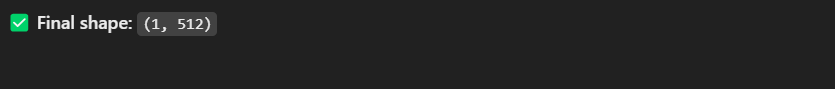

In [ ]:
small_list.shape

AttributeError: 'list' object has no attribute 'len'